In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 75kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=446ec2f1e4f344525c05d69f3cd0739f942b8163ce9b9ff7e10bac318376d4e7
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
import face_recognition   ##Detecting and recogniting faces
import cv2     
import os       
from google.colab.patches import cv2_imshow
import pandas as pd 
import datetime

#Webcam Implementation

In [3]:
#FOR WEBCAM

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import html
import time

In [4]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [6]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [7]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  #for (x,y,w,h) in faces:
      #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

Stores images in known folder

Enter your name: Test


<IPython.core.display.Javascript object>

(480, 640)
Saved to /content/drive/MyDrive/SDP - ML(2021)/Project/known/Test.jpg


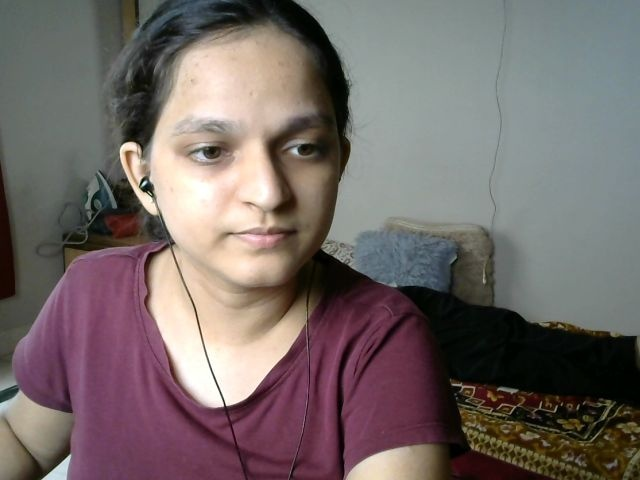

In [10]:
try:
  your_name = input("Enter your name: ")
  filename = take_photo('/content/drive/MyDrive/SDP - ML(2021)/Project/known'+ '/' + your_name + '.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Stores images in unknown folder

In [ ]:
try:
  your_name = input("Enter your name: ")
  filename = take_photo('/content/drive/MyDrive/SDP - ML(2021)/Project/unknown'+ '/' + your_name + '.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#Face Recognition

In [11]:
def read_img(path):
   img = cv2.imread(path) ## reading image
   (h,w) = img.shape[:2]  ## fetching height and width
   width = 300            ## hard coding width
   ratio = width / float(w) ## preparing a ration for height
   height = int(h * ratio)  ## generating new height
   return cv2.resize(img,(width,height)) ##return the reshaped image

###KNOWN

[-0.1484217   0.10923461 -0.01254632 -0.03140514 -0.0085318  -0.07732239
 -0.00906849 -0.05145719  0.16865726 -0.08978395  0.1539329  -0.05412656
 -0.19849586 -0.10054728 -0.04428602  0.08899283 -0.18805805 -0.14185156
 -0.07850633 -0.09809173  0.1200387  -0.0179388   0.00830108  0.10418934
 -0.15402091 -0.29147395 -0.09766346 -0.12861072 -0.02748708 -0.08809945
 -0.06367884  0.013663   -0.20851924 -0.06277522 -0.05941961  0.0466997
  0.04783028  0.00148888  0.12432163 -0.01205003 -0.13947746 -0.06680604
  0.02528712  0.26701456  0.22158723  0.07566589 -0.05332193 -0.01797844
  0.16468868 -0.26265112  0.01277153  0.14183153  0.12236449  0.0551271
  0.05085329 -0.07675245  0.01466208  0.09657736 -0.22822534  0.03431151
 -0.06815483 -0.10092438 -0.03946641 -0.03073105  0.22534648  0.188067
 -0.09870495 -0.11452264  0.17334643 -0.21869083 -0.03398401  0.06640371
 -0.06330002 -0.1978545  -0.27599886  0.05351179  0.45344397  0.13305154
 -0.14560157  0.04825319 -0.07625774 -0.05891611  0.103

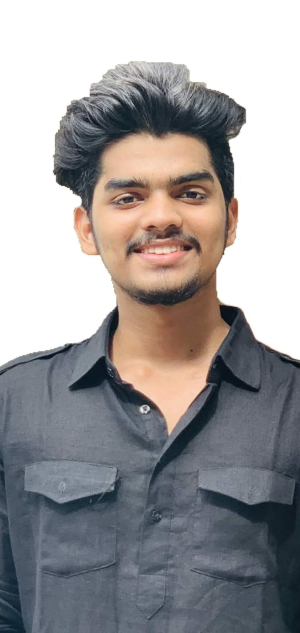

[-0.07905705  0.12163522  0.01844318  0.02766713 -0.04473303 -0.00165604
 -0.00520436 -0.08824875  0.24882254 -0.11839762  0.20869316  0.04972845
 -0.15227798 -0.09911901  0.00955734  0.0637989  -0.11274886 -0.15318593
 -0.02570589 -0.11567254  0.04101685  0.00334734 -0.02325536  0.07352316
 -0.15471587 -0.30570811 -0.06218954 -0.08845112  0.07408147 -0.09002185
  0.02469697  0.05140259 -0.18226972 -0.02921958 -0.02498928  0.10315073
 -0.02606753  0.0228757   0.16757374  0.05305836 -0.12368542 -0.05858624
 -0.01782613  0.30625325  0.19495419  0.02527109  0.02001098 -0.0630298
  0.05308194 -0.21551436  0.02069147  0.17680183  0.07665671  0.06653158
  0.08219318 -0.14799604 -0.04022578 -0.00882909 -0.12519027  0.09465501
  0.01663618 -0.10074304 -0.05339728 -0.03164587  0.23794992  0.07279518
 -0.06463477 -0.13930595  0.13332623 -0.21606065 -0.07380459  0.11250238
 -0.06299447 -0.18338612 -0.24975808  0.07427415  0.44769362  0.19167291
 -0.15499872  0.07239094 -0.10748605 -0.03861637  0.

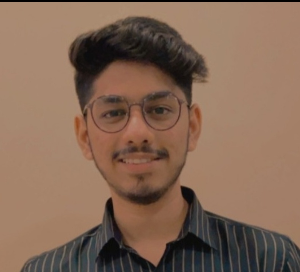

[-0.08657812  0.07341402  0.065308   -0.08263604 -0.05901998 -0.03892598
 -0.02305677 -0.14247696  0.16602723 -0.13497709  0.13706061 -0.04595073
 -0.25507051 -0.09274255 -0.00761349  0.17367244 -0.08981407 -0.24489863
 -0.08290522 -0.02852286  0.01563214 -0.01440713  0.05060781  0.08608024
 -0.2033346  -0.28548265 -0.07234444 -0.06374608  0.04068618 -0.07427345
  0.00082811  0.11986998 -0.3058036  -0.04158777  0.03435588  0.1603266
  0.00098233 -0.04879922  0.15236233 -0.04870041 -0.27282485 -0.02289355
  0.08919123  0.14823806  0.21630277  0.02039445  0.0238539  -0.05033343
  0.08438231 -0.28307447  0.00332426  0.08628708  0.0470703   0.04559304
  0.05181585 -0.20466292  0.03772964  0.09997365 -0.19419079  0.03188626
  0.02480346 -0.09616134 -0.0567552   0.01318557  0.19459647  0.09249004
 -0.09310035 -0.15993303  0.28087816 -0.21012674  0.03595445  0.16829242
 -0.06211999 -0.11244384 -0.26671737 -0.03611994  0.41811115  0.12535138
 -0.11246413  0.10626657 -0.05181677  0.05164249 -0.

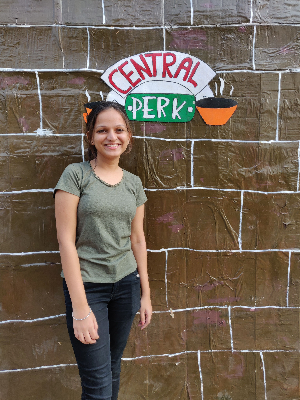

[-0.06059268 -0.0142012   0.06908515 -0.11122721 -0.14051014 -0.01470298
 -0.01298679 -0.13106926  0.17416258 -0.13591729  0.15839832 -0.04646389
 -0.22748567 -0.05771356 -0.03406138  0.16829884 -0.11222049 -0.11333685
 -0.02681747 -0.05610317 -0.01853789  0.02633943  0.026033    0.05914387
 -0.20189235 -0.34111041 -0.07298439 -0.04184009 -0.0649547  -0.05219604
 -0.06803696  0.14889938 -0.19509162 -0.00165093  0.06379795  0.17420851
 -0.06986404 -0.10648516  0.12180369  0.01296343 -0.25355288 -0.08499227
  0.09190144  0.21584991  0.2146333   0.00200404  0.03111271 -0.03136092
  0.09947577 -0.29352891  0.09333782  0.04202774  0.0464616  -0.00524081
  0.05893451 -0.16749699 -0.02842417  0.0927761  -0.16855323 -0.07985741
  0.04978307 -0.10698105 -0.08469771 -0.06176857  0.23398161  0.1730285
 -0.13671985 -0.09023079  0.1813373  -0.19746183 -0.0013115   0.03873854
 -0.09868943 -0.1525902  -0.30621779 -0.00055271  0.42309099  0.14802587
 -0.09533529  0.02352227 -0.07127353  0.04818855  0.

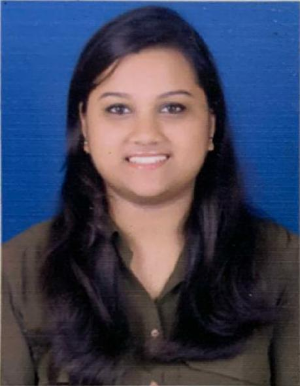

[-1.02953322e-01  8.03239364e-03  6.12879321e-02 -1.01224780e-02
 -9.43861306e-02 -4.80495244e-02 -1.86739713e-02 -1.17332995e-01
  4.05564532e-02 -1.15062989e-01  1.27582639e-01 -5.94497621e-02
 -2.02964708e-01 -8.46950188e-02 -1.65051352e-02  1.25621125e-01
 -1.50401518e-03 -1.91430435e-01 -1.27066508e-01 -1.06963933e-01
 -1.05309188e-02  2.83554159e-02 -4.04511392e-03  5.71502298e-02
 -1.27151072e-01 -2.81532049e-01 -8.36138278e-02 -7.43225068e-02
 -1.31466929e-02 -6.26420155e-02  3.37789059e-02  1.17316686e-01
 -2.18348354e-01 -3.17762457e-02  3.50130200e-02  1.14966333e-01
  5.34272529e-02  5.84115982e-02  2.40252361e-01 -1.29318610e-02
 -2.07109720e-01 -3.01129874e-02  1.18136078e-01  2.19007075e-01
  1.02001399e-01  8.18490088e-02  4.61865216e-02 -2.91352607e-02
  1.19409308e-01 -1.89824477e-01  1.16272040e-01  1.07259750e-01
  1.21660590e-01  7.23296925e-02  7.15447813e-02 -1.57492995e-01
  3.52902934e-02  1.16615176e-01 -1.83979899e-01  8.92098099e-02
  4.47232202e-02 -8.21377

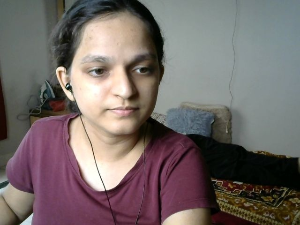

['Aditya-Singh', 'Abhilash-Poojary', 'Aditi-Rao', 'RITIKA NAIR ', 'Test']


In [12]:
known_encodings = [] 
known_names = []
known_dir = '/content/drive/MyDrive/SDP - ML(2021)/Project/known' ##Known directory path
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file) ##Reading all the images
  img_enc = face_recognition.face_encodings(img)[0] ##face encodings
  known_encodings.append(img_enc) 
  print(img_enc)
  print(file)
  known_names.append(file.split('.')[0])
  cv2_imshow(img)
print(known_names) ## Printing all the known labels

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#To display timestamp in our attendance Sheet

from datetime import datetime 
import pytz
UTC = pytz.utc
IST = pytz.timezone('Asia/Kolkata')
date_time = datetime.now(IST)
format = "%d/%m/%Y %H:%M:%S"
dt = date_time.strftime(format)
print(dt)

df1 = df = pd.DataFrame({"Name":[],
                         "Timestamp":[]})

09/07/2021 16:14:46


###UNKNOWN

Processing formalspic.jpg
[0.60618647 0.29989099 0.75445112 0.7577784  0.75387046]


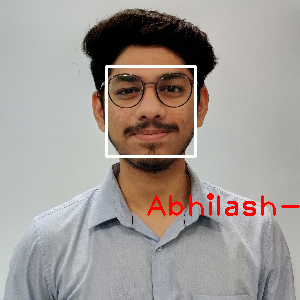

Processing elon.jpg
[0.84170142 0.74070344 0.79118193 0.78281245 0.79199065]
Person not found
Processing IMG_20210708_201203.jpg
[0.43662517 0.64657784 0.71485697 0.78032513 0.6657848 ]


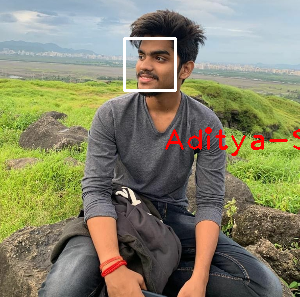

Processing Capture.PNG
[0.83450998 0.7746191  0.62979132 0.41335858 0.75504802]


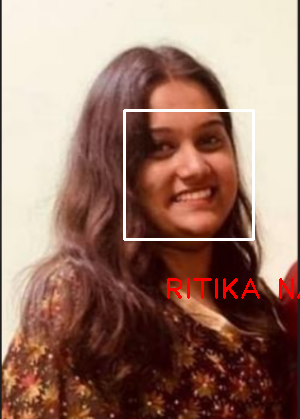

Processing Aditi-Rao.jpg
[0.6998048  0.72209616 0.         0.61167243 0.5351844 ]


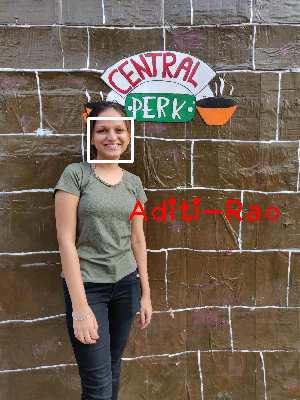

In [21]:
unknown_dir = '/content/drive/MyDrive/SDP - ML(2021)/Project/unknown' ##UNknown Images Directory
for file in os.listdir(unknown_dir):
  print("Processing",file)
  img = read_img(unknown_dir + '/' + file)##reading images
  img_enc = face_recognition.face_encodings(img)[0]##Encodings
  results = face_recognition.compare_faces(known_encodings,img_enc)
  ##Comparing Known Encodings with Unknown encoding
  print(face_recognition.face_distance(known_encodings,img_enc))
  try: 
    res = [i for i, val in enumerate(results) if val]
    name = known_names[res[0]]
    ## Printing Face Distances
    mydf = pd.DataFrame({"Name":[name],
                          "Timestamp":[dt]})
    df1 = df1.append(mydf)

    (top,right,bottom,left) = face_recognition.face_locations(img)[0]
    cv2.rectangle(img,(left,top),(right,bottom),(255,255,255),2)
    ##Drawing Rectangle
    cv2.putText(img,name,(left+40,bottom+60),cv2.FONT_HERSHEY_PLAIN,2, (0,0,255),2) ##Putting labels(names) on the rectangle

    cv2_imshow(img) ##showing images

  except  Exception as err:
    print('Person not found')

In [15]:
df1

,Name,Timestamp
0,Abhilash-Poojary,09/07/2021 16:14:46
0,Aditi-Rao,09/07/2021 16:14:46
0,Aditya-Singh,09/07/2021 16:14:46
0,RITIKA NAIR,09/07/2021 16:14:46


In [16]:
#/content/drive/MyDrive/SDP - ML(2021)/Project/file1.csv
print(df1)
df1.to_csv('/content/drive/MyDrive/SDP - ML(2021)/Project/file1.csv')

               Name            Timestamp
0  Abhilash-Poojary  09/07/2021 16:14:46
0         Aditi-Rao  09/07/2021 16:14:46
0      Aditya-Singh  09/07/2021 16:14:46
0      RITIKA NAIR   09/07/2021 16:14:46
